In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SongLyrics.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Lyrics', 'Songs_link', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'], axis=1, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,Lyrics,Songs_link
1,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/stopmessi...
3,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/streetjes...
5,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sudonasun...
7,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunnyside...
9,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunshine....


In [7]:
songs = pd.read_csv('Final_Song_List.csv')

In [8]:
songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Artist_list', 'Songs_list'], dtype='object')

In [9]:
songs.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
def full_link(link):
    return "http://azlyrics.com" + link[2:]

In [11]:
songs['Songs_link'] = songs['Songs_list'].apply(full_link)

In [12]:
songs.drop('Songs_list', axis=1, inplace=True)

In [13]:
songs.head()

,Artist_list,Songs_link
0,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/16ondeathrow.html
1,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
2,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
3,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/5deadlyvenomz....
4,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/acrookedniggat...


In [14]:
final_df = pd.merge(df, songs, on="Songs_link")

In [15]:
final_df.head()

,Lyrics,Songs_link,Artist_list
0,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html
1,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html
2,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html
3,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html
4,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html


In [28]:
def remove_extra_characters(string):
    string = string.replace("\r", "")
    string = string.replace("\n", " ")
    string = string.replace("\'", "")
    string = string.replace(".", "")
    return string

In [29]:
final_df['Lyrics'] = final_df['Lyrics'].apply(remove_extra_characters)

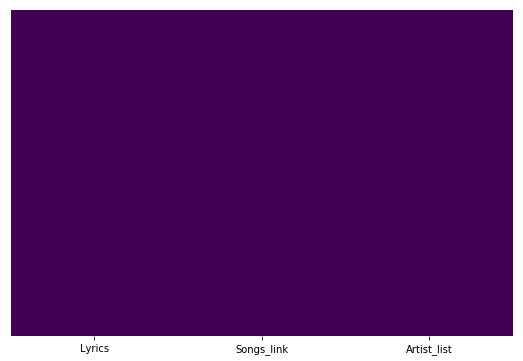

In [30]:
plt.figure(figsize=(9,6))
sns.heatmap(final_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Hence, there are no null values in the final dataframe.

In [36]:
final_df.drop_duplicates(['Songs_link'], keep='first', inplace=True)

In [38]:
final_df.describe()

,Lyrics,Songs_link,Artist_list
count,23318,23318,23318
unique,23191,23318,106
top,[Instrumental],http://azlyrics.com/lyrics/chicago/wakeupsunsh...,https://www.azlyrics.com/c/cash.html
freq,18,1,783


In [39]:
def number_of_words(string):
    array = string.split(" ")
    return len(array)

In [40]:
final_df['Length of lyrics'] = final_df['Lyrics'].apply(number_of_words)

In [44]:
final_df.describe()

,Length of lyrics
count,23318.000000
mean,276.972339
std,174.140975
min,4.000000
25%,168.000000
50%,233.000000
75%,329.000000
max,3717.000000


In [41]:
final_df.head()

,Lyrics,Songs_link,Artist_list,Length of lyrics
0,"Baby, please stop messin round Youll be mess...",http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html,136
1,Hey have you heard the news? Somebody stole ...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html,483
2,I was a city boy Cought up in a city way A n...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html,188
3,You hear them people talkin About the man ab...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html,304
4,i sold my soul for a one night stand I follo...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html,220


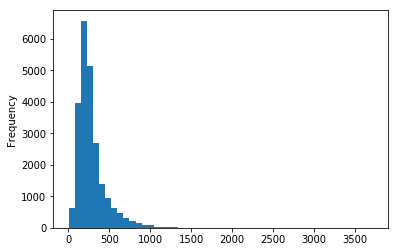

In [42]:
final_df['Length of lyrics'].plot(bins=50, kind='hist')

In [46]:
final_df[final_df['Length of lyrics'] == 3717]['Artist_list']

9530    https://www.azlyrics.com/e/eminem.html
Name: Artist_list, dtype: object